## K mean clustering
Steps 
1. Take two random centroid
2. Find the distance of the next value from both centroid, the value is closer to which ever centroid its part of that cluster
3. Calculate the new centroid of the cluster where the value is added
4. Repeat the process
eg. price and volume of 5 days for itc
price = [408, 406, 405, 401, 400]
volume = [306, 151, 96, 380, 249]



In [ ]:
# K mean clustering algorithm

import numpy as np
def get_euclidian_distance(new_dim_tuple, centroid_tuple):
    return np.sqrt(((new_dim_tuple[0] - centroid_tuple[0])**2) + ((new_dim_tuple[1] - centroid_tuple[1])**2))

def generate_new_centroid(existing_centroid, new_dimension):
    return (((existing_centroid[0] + new_dimension[0])/2), (((existing_centroid[1] + new_dimension[1])/2)))

price = [408, 406, 405, 401, 400]
volume = [306, 151, 96, 380, 249]

def create_clusters():
    # first set of centroids
    k1 = (price[0], volume[0])
    k2 = (price[1], volume[1])

    c1 = [0]
    c2 = [1]

    idx = 2
    for idx, (px, vol) in enumerate(zip(price[2:], volume[2:]), 2):
        k1_distance = get_euclidian_distance((px, vol), (k1))
        k2_distance = get_euclidian_distance((px, vol), (k2))
        if k1_distance < k2_distance:
            c1.append(idx)
            k1 = generate_new_centroid(k1, (px, vol))
        else:
            c2.append(idx)
            k2 = generate_new_centroid(k2, (px, vol))
    print(f'c1 - {c1} -- c2 - {c2}')

create_clusters()


c1 - [0, 3, 4] -- c2 - [1, 2]


### How to determine k
In order to determin k, you can use the elbow method
Take sum of squared error on y axis and k on x axis this will form a line graph similar to bend hand which will help you determine k at elbow

In [17]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Create dataframe for price and volume

df = pd.DataFrame({
    'px': price,
    'vol': volume
})

df

,px,vol
0,408,306
1,406,151
2,405,96
3,401,380
4,400,249


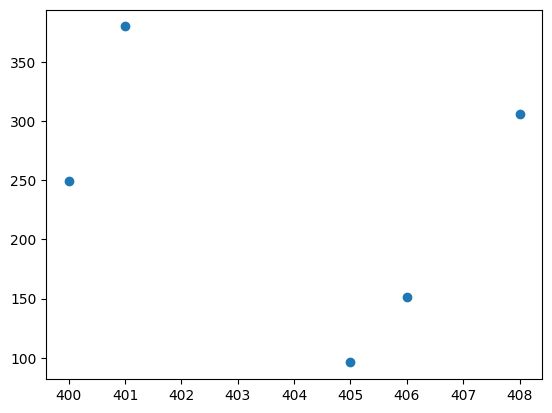

In [20]:
plt.scatter(df.px, df.vol)

In [24]:
# Determine k

sse = []
krng = range(1, df.shape[0]+1)
for k in krng:
    km = KMeans(n_clusters=k)
    km.fit(df[['px', 'vol']])
    sse.append(km.inertia_)
sse

[52675.200000000004, 10179.666666666666, 3169.5, 1513.0, 0.0]

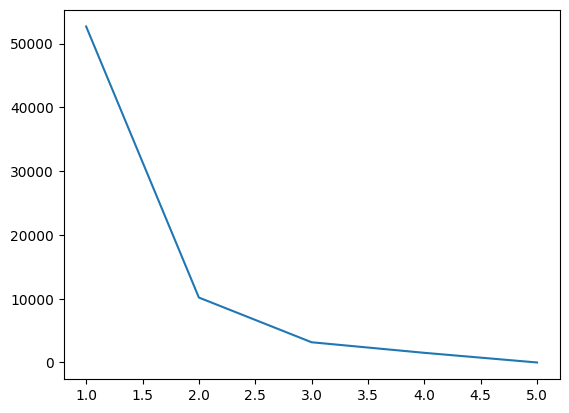

In [25]:
plt.plot(krng, sse)

In [30]:
# Better to have 3 clusters based on above graph, but we will stick with 2 for now
# Let's scale px and vol to same scale 

scaler = MinMaxScaler()
scaler.fit(df[['px']])
df['scaled_px'] = scaler.transform(df[['px']])
scaler.fit(df[['vol']])
df['scaled_vol'] = scaler.transform(df[['vol']])

df

,px,vol,scaled_px,scaled_vol
0,408,306,1.000,0.739437
1,406,151,0.750,0.193662
2,405,96,0.625,0.000000
3,401,380,0.125,1.000000
4,400,249,0.000,0.538732


In [31]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(df[['px', 'vol']])
y_pred

array([0, 1, 1, 0, 0])

In [32]:
df['pred_cluster'] = y_pred
df

,px,vol,scaled_px,scaled_vol,pred_cluster
0,408,306,1.000,0.739437,0
1,406,151,0.750,0.193662,1
2,405,96,0.625,0.000000,1
3,401,380,0.125,1.000000,0
4,400,249,0.000,0.538732,0


<Axes: xlabel='scaled_px', ylabel='scaled_vol'>

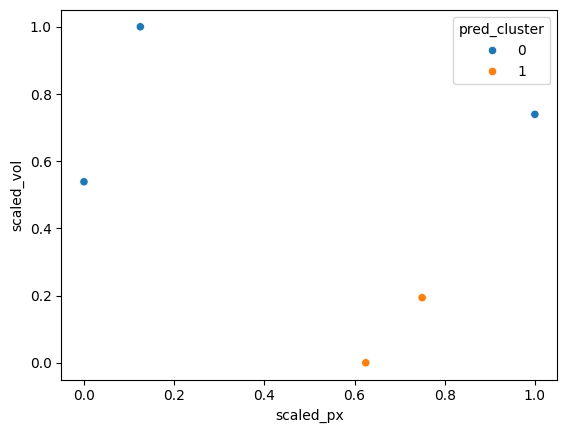

In [33]:
import seaborn as sns
sns.scatterplot(data=df, x='scaled_px', y='scaled_vol', hue='pred_cluster')

In [ ]:
# These are the centroids
km.cluster_centers_

array([[403.        , 311.66666667],
       [405.5       , 123.5       ]])

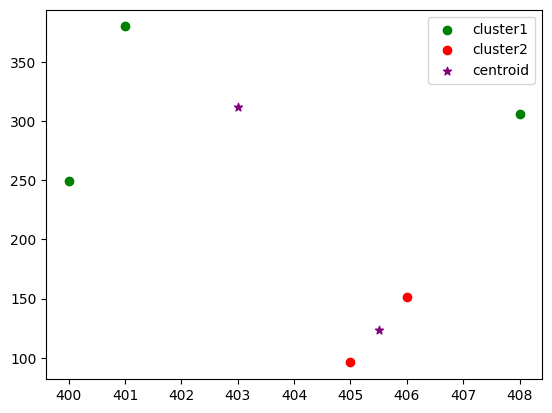

In [42]:
# looking at this plot seems like 3 clusters would have made more sense
# let's add centroid to the plot now
df1 = df[df.pred_cluster==0]
df2 = df[df.pred_cluster==1]
plt.scatter(df1.px, df1.vol, color='green', label='cluster1')
plt.scatter(df2.px, df2.vol, color='red', label='cluster2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.legend()